My name is Natnael Fikre,
The following is Hamoye's a graded assessment for introduction to python learning track


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from scipy.stats import kurtosis
from scipy.stats import skew
#importing all the necessary datasets

In [2]:
project1 = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv', error_bad_lines=False)# Read from csv

In [3]:
new_project1 = pd.DataFrame(project1)



In [4]:
new_project1.shape

(29523, 11)

In [110]:
new_project1.head(30000)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


**Cleaning data**

In [6]:
new_project1.isnull()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29518,False,False,False,False,False,False,False,False,False,False,False
29519,False,False,False,False,False,False,False,False,False,False,False
29520,False,False,False,False,False,False,False,False,False,False,False
29521,False,False,False,False,False,False,False,False,False,False,False


In [96]:
new_project1.isnull().sum()#missing values from the entire data set per column

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [101]:
(180/29523)*100 # is the percent of missing values

0.609694136774718

In [8]:
droped=new_project1.dropna()# can drop all null values and re-adjust the shape

In [9]:
droped.shape

(29343, 11)

In [10]:
droped.isnull().sum()#to show there is no missing values after dropping all Null 

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [11]:
new_project1.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [ ]:
new_project1[['fuel_unit']]=new_project1[['fuel_unit']].fillna(value='mcf')

In [12]:
new_project1.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

**Wrangling and exploring Data**

In [13]:
new_project1.groupby('plant_name_ferc1')['plant_name_ferc1'].count()

plant_name_ferc1
(1)sta98                1
(2) scriba sta. 99      1
(n) contra costa        1
(n) pittsburg           1
(n)(t)moss landing      1
                       ..
zimmer- aepgr share     2
zion                    3
zorn                   12
zorn ct                10
zuni                   17
Name: plant_name_ferc1, Length: 2315, dtype: int64

In [14]:
new_project1.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [109]:
new_project1.groupby('fuel_type_code_pudl').sum()# to show the lowest average fuel cost per unit burned

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,988354,17133514,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
gas,1425666,23040664,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
nuclear,87851,1638430,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
oil,913137,16186028,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
other,18448,334284,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
waste,68026,884492,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


In [102]:
ranking=new_project1.groupby('fuel_cost_per_unit_burned').rank() # corelation

In [103]:
ranking

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1.0,1.0,2.0,1.0,2.0,2.0
1,1.0,2.0,7.5,2.0,8.0,7.0
2,1.0,1.0,2.0,2.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,5.0,5.0,8.5,1.0
...,...,...,...,...,...,...
29518,1.0,10.5,1.0,10.0,7.0,11.0
29519,2.0,8.5,7.0,9.0,5.0,9.0
29520,2.0,9.0,4.0,8.0,6.5,9.0
29521,1.0,10.0,8.0,10.0,10.0,1.0


In [18]:
new_project1.groupby('report_year')['report_year'].tail()

1230     1994
1231     1994
1232     1994
1233     1994
1234     1994
         ... 
29518    2018
29519    2018
29520    2018
29521    2018
29522    2018
Name: report_year, Length: 125, dtype: int64

In [19]:
new_project1.groupby('report_year').last()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994,f1_fuel_1994_12_45_2_7,45,buzz.roost,gas,mcf,92365.0,1.035000,3.790,3.790,3.685
1995,f1_fuel_1995_12_45_2_10,45,lincoln,gas,mcf,793392.0,1.033000,2.220,2.220,2.064
1996,f1_fuel_1996_12_45_2_10,45,lincoln,gas,mcf,1326038.0,1.036000,3.315,3.315,3.255
1997,f1_fuel_1997_12_27_3_15,27,dicks creek gt,gas,mcf,24238.0,1.027000,3.820,3.820,3.720
1998,f1_fuel_1998_12_145_2_12,145,fort st. vrain,gas,mcf,5034730.0,1.044000,2.384,0.000,2.282
1999,f1_fuel_1999_12_145_2_12,145,fort st. vrain,gas,mcf,13282171.0,1.045000,2.568,0.000,2.457
2000,f1_fuel_2000_12_70_0_9,70,valmy,oil,bbl,6364.0,5.828676,37.314,41.469,6.400
2001,f1_fuel_2001_12_70_0_10,70,danskin,gas,mcf,234256.0,1.032000,10.068,10.068,9.760
2002,f1_fuel_2002_12_41_3_3,41,straits,gas,mcf,29628.0,1.000000,2.696,2.696,2.696


**Visualiing and stastical Data on selected type of fuel and active data reporting period**

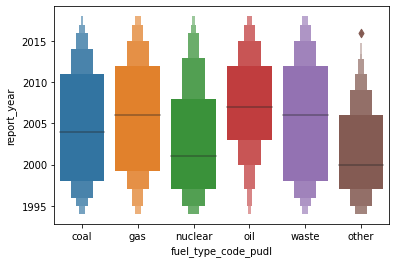

In [20]:
plot1=sns.boxenplot(data=new_project1, x='fuel_type_code_pudl', y='report_year')

In [21]:
kickstart=new_project1.sample(n=29523, random_state=5)

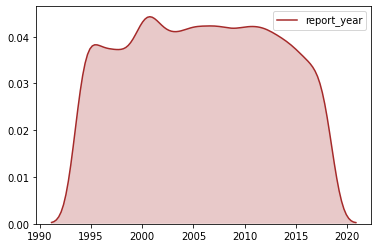

In [22]:
plot2=sns.kdeplot(kickstart['report_year'],shade= True, color="brown")

In [57]:
deviation=np.array(new_project1['fuel_mmbtu_per_unit'])


In [58]:
print(deviation)

[16.59  16.592 24.13  ...  1.06  16.108  1.059]


In [61]:
deviation.std()#print("Standard deviation:")

10.600040781503973

In [60]:
deviation.mean()

8.49211066832639

In [62]:
np.percentile(deviation,75)#print(the 75th percentile)

17.006

In [91]:
skeww=np.array(new_project1['fuel_qty_burned'])

In [93]:
format(skew(skeww))

'15.850690077422112'

In [94]:
format(kurtosis(skeww))

'651.2589365474387'

In [136]:
burned=new_project1.groupby('report_year').first()

In [137]:
burned

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994,f1_fuel_1994_12_1_0_7,1,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.1210
1995,f1_fuel_1995_12_200_0_1,200,aroostook valley,waste,ton,327060.0,0.004500,0.000,13.150,1.4600
1996,f1_fuel_1996_12_204_0_1,204,seabrook,nuclear,gramsU,34.0,0.000006,26.381,0.000,0.0000
1997,f1_fuel_1997_12_1_0_7,1,rockport total aeg,coal,ton,5043970.0,16.752000,19.369,19.070,1.1560
1998,f1_fuel_1998_12_1_0_7,1,rockport total aeg,coal,ton,4965881.0,17.198000,19.282,19.338,1.1260
1999,f1_fuel_1999_12_141_0_1,141,boardman,coal,ton,2118951.0,18.052000,20.043,20.054,1.1100
2000,f1_fuel_2000_12_141_0_1,141,boardman,coal,ton,2084751.0,17.034000,19.225,19.293,1.1290
2001,f1_fuel_2001_12_195_0_1,195,pulliam 3,coal,ton,55679.0,17.638000,20.560,19.380,1.1560
2002,f1_fuel_2002_12_195_0_1,195,pulliam 3,coal,ton,82877.0,17.456000,19.410,17.070,1.1020


In [124]:
avg=np.array(burned['fuel_cost_per_unit_burned'])

In [125]:
avg

array([ 18.59 ,   0.   ,  26.381,  19.369,  19.282,  20.043,  19.225,
        20.56 ,  19.41 , 279.13 ,  24.092,  17.552,  65.57 ,  80.46 ,
        29.148,  30.411,  33.299,  35.301,  34.93 ,  32.971,  33.834,
        58.465,  51.787,  60.388,  63.123])

In [132]:
percentile_of_burned_fuel=((avg[4]-avg[0])/avg[0])*100

In [133]:
print(percentile_of_burned_fuel)

3.722431414739108
